These are experiments that I did for my thesis.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import copy

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

color_list = [x["color"] for x in plt.rcParams["axes.prop_cycle"]]

from matplotlib.ticker import MaxNLocator

import multiprocessing
import os
import pickle
import scipy

In [3]:
from lut import *

In [16]:
def tlga(hidden_layers, num_bits):
    """
    Train LUT get accuracies.
    """
    lut = Lut(bits=[num_bits] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=False)
    preds_train = lut.train(X_train, y_train)
    preds_test = lut.predict(X_test)
    acc_train = accuracy_score(preds_train, y_train)
    acc_test = accuracy_score(preds_test, y_test)
    print(f"{num_bits} Accuracy on training set: {acc_train:.2f}")
    print(f"{num_bits} Accuracy on test set: {acc_test:.2f}")
    return acc_train, acc_test

# Loading the dataset and pre-processing

In [8]:
from mnist import load_mnist, load_mnist_binary

X_train, X_test, y_train, y_test = load_mnist_binary()

# Smaller LUT

In [5]:
%%time
hidden_layers = [32] * 5
lut = Lut(bits=[10] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train, y_train)
preds_test = lut.predict(X_test)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:56<00:00, 35.36s/it]


Accuracy on training set: 0.88
Accuracy on test set: 0.84
CPU times: user 35.7 s, sys: 1min 30s, total: 2min 5s
Wall time: 3min 28s


In [8]:
%%time
hidden_layers = [256] * 5
lut = Lut(bits=[10] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train, y_train)
preds_test = lut.predict(X_test)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [11:25<00:00, 137.18s/it]


Accuracy on training set: 0.93
Accuracy on test set: 0.88
CPU times: user 1min 12s, sys: 2min 36s, total: 3min 48s
Wall time: 12min 54s


In [7]:
%%time
hidden_layers = [256] * 5
lut = Lut(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train, y_train)
preds_test = lut.predict(X_test)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:58<00:00, 23.71s/it]


Accuracy on training set: 0.88
Accuracy on test set: 0.87
CPU times: user 17.4 s, sys: 22.9 s, total: 40.3 s
Wall time: 2min 17s


# Different threshold

In [9]:
X_train_, X_test_, y_train_, y_test_ = load_mnist_binary(thresh=0.1)

In [10]:
%%time
hidden_layers = [1024] * 5
lut = Lut(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train_, y_train_)
preds_test = lut.predict(X_test_)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train_):.2f}")
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test_):.2f}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:16<00:00, 87.27s/it]


Accuracy on training set: 0.90
Accuracy on test set: 0.89
CPU times: user 22.8 s, sys: 29.8 s, total: 52.5 s
Wall time: 8min 29s


# Experiment 1

**Setup:**
- Network with 5 hidden layers of 1024 luts and 1 lut in the output layer
- Each lut takes 8 inputs

**Result:**
- Training accuracy: 0.89
- Accuracy on test set: 0.87
- Results significantly above 0.5 which would be random

In [5]:
%%time
hidden_layers = [1024] * 5
lut = Lut(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train, y_train)
preds_test = lut.predict(X_test)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:44<00:00, 92.91s/it]


Accuracy on training set: 0.89
Accuracy on test set: 0.87
CPU times: user 26.7 s, sys: 31.5 s, total: 58.2 s
Wall time: 9min 30s


In [7]:
# import pickle

# with open(r"data/lut/lut_experiment_1.pkl", "wb") as f:
#     pickle.dump(lut, f)

In [11]:
acc = lut.get_accuracies_per_layer(X_train, y_train)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:34<00:00, 90.88s/it]


In [13]:
# with open(r"data/lut/acc_experiment_1.pkl", "wb") as f:
#     pickle.dump(acc, f)

In [47]:
with open(r"data/lut/acc_experiment_1.pkl", "rb") as f:
    acc = pickle.load(f)

In [ ]:
acc_ = np.vstack((np.array(acc[:-1]), np.repeat(acc[-1], repeats=1024)[None, :]))
acc_mean = acc_.mean(1)
acc_std = acc_.std(1)

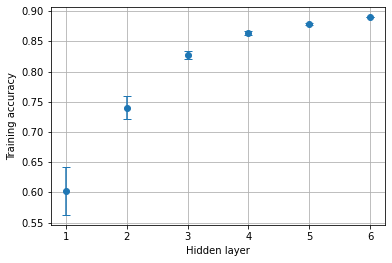

In [52]:
fig, ax = plt.subplots(1, 1)

ax.errorbar(range(1, 7), acc_mean, yerr=acc_std, capsize=4, fmt="o")
ax.set_xlabel("Hidden layer")
ax.set_ylabel("Training accuracy")
ax.grid();

In [54]:
# For latex tikz plot
for i in range(6):
    print(f"{i + 1}  0.001   {acc_mean[i]:.4f}  {acc_std[i]:.4f}")

1  0.001   0.6025  0.0399
2  0.001   0.7403  0.0186
3  0.001   0.8278  0.0069
4  0.001   0.8636  0.0035
5  0.001   0.8789  0.0016
6  0.001   0.8900  0.0000


# Majority Vote

In [ ]:
%%time

acc_train = []
acc_train_major = []
acc_test = []
acc_test_major = []

for bt in range(2, 11):
    hidden_layers = [1024] * 5
    lut = Lut(bits=[bt] * (len(hidden_layers) + 1), hidden_layers=hidden_layers)

    preds_train = lut.train(X_train, y_train)
    preds_train_major = lut.predict(X_train, majority_vote=True)
    preds_test = lut.predict(X_test)
    preds_test_major = lut.predict(X_test, majority_vote=True)
    
    at = accuracy_score(preds_train, y_train)
    atm = accuracy_score(preds_train_major, y_train)
    atst = accuracy_score(preds_test, y_test)
    atstm = accuracy_score(preds_test_major, y_test)
    
    acc_train.append(at)
    acc_train_major.append(atm)
    acc_test.append(atst)
    acc_test_major.append(atstm)
    
    print(f"Bit-size: {bt}")
    print(f"Train: {at:.2f} / {atm:.2f}")
    print(f"Test: {atst:.2f} / {atstm:.2f}")
    print()

Bit-size: 2
Train: 0.66 / 0.77
Test: 0.67 / 0.78

Bit-size: 3
Train: 0.77 / 0.79
Test: 0.77 / 0.80

Bit-size: 4
Train: 0.81 / 0.81
Test: 0.82 / 0.82

Bit-size: 5
Train: 0.83 / 0.83
Test: 0.83 / 0.83

Bit-size: 6
Train: 0.85 / 0.85
Test: 0.85 / 0.85

Bit-size: 7
Train: 0.87 / 0.87
Test: 0.86 / 0.86

Bit-size: 8
Train: 0.89 / 0.88
Test: 0.87 / 0.87

Bit-size: 9
Train: 0.91 / 0.91
Test: 0.88 / 0.88



In [5]:
res = """Bit-size: 2
Train: 0.66 / 0.77
Test: 0.67 / 0.78

Bit-size: 3
Train: 0.77 / 0.79
Test: 0.77 / 0.80

Bit-size: 4
Train: 0.81 / 0.81
Test: 0.82 / 0.82

Bit-size: 5
Train: 0.83 / 0.83
Test: 0.83 / 0.83

Bit-size: 6
Train: 0.85 / 0.85
Test: 0.85 / 0.85

Bit-size: 7
Train: 0.87 / 0.87
Test: 0.86 / 0.86

Bit-size: 8
Train: 0.89 / 0.88
Test: 0.87 / 0.87

Bit-size: 9
Train: 0.91 / 0.91
Test: 0.88 / 0.88"""

In [18]:
train_no_major = [float(x) for x in re.findall("Train: (.+?) ", res)]
train_major = [float(x) for x in re.findall("Train.+?/ (.+?)\n", res)]

test_no_major = [float(x) for x in re.findall("Test: (.+?) ", res)]
test_major = [float(x) for x in re.findall("Test.+?/ (.+?)\n", res)]

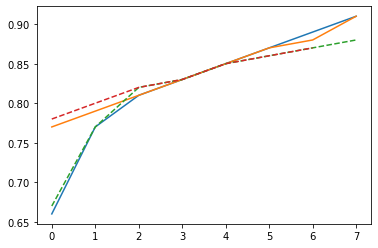

In [24]:
fig, ax = plt.subplots(1, 1)

ax.plot(train_no_major)
ax.plot(train_major)

ax.plot(test_no_major, ls="--")
ax.plot(test_major, ls="--")

In [5]:
bit_arr = list(range(2, 11))

In [6]:
%%time

train_no_major = []
test_no_major = []

for bit in bit_arr:
    hidden_layers = [1024] * 5
    lut = Lut(bits=[bit] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)
    preds_train = lut.train(X_train, y_train)
    preds_test = lut.predict(X_test)

    train_acc = accuracy_score(preds_train, y_train)
    test_acc = accuracy_score(preds_test, y_test)
    train_no_major.append(train_acc)
    test_no_major.append(test_acc)
    print(f"Bits: {bit} Accuracy on training set: {train_acc:.2f}")
    print(f"Bits: {bit} Accuracy on test set: {test_acc:.2f}")

100%|█████████████████████████████████████████████| 5/5 [00:13<00:00,  2.63s/it]


Bits: 2 Accuracy on training set: 0.64
Bits: 2 Accuracy on test set: 0.65


100%|█████████████████████████████████████████████| 5/5 [00:17<00:00,  3.52s/it]


Bits: 3 Accuracy on training set: 0.76
Bits: 3 Accuracy on test set: 0.76


100%|█████████████████████████████████████████████| 5/5 [00:28<00:00,  5.76s/it]


Bits: 4 Accuracy on training set: 0.80
Bits: 4 Accuracy on test set: 0.80


100%|█████████████████████████████████████████████| 5/5 [00:51<00:00, 10.32s/it]


Bits: 5 Accuracy on training set: 0.83
Bits: 5 Accuracy on test set: 0.83


100%|█████████████████████████████████████████████| 5/5 [01:40<00:00, 20.17s/it]


Bits: 6 Accuracy on training set: 0.85
Bits: 6 Accuracy on test set: 0.84


100%|█████████████████████████████████████████████| 5/5 [03:39<00:00, 43.95s/it]


Bits: 7 Accuracy on training set: 0.87
Bits: 7 Accuracy on test set: 0.86


100%|█████████████████████████████████████████████| 5/5 [07:45<00:00, 93.16s/it]


Bits: 8 Accuracy on training set: 0.89
Bits: 8 Accuracy on test set: 0.87


100%|████████████████████████████████████████████| 5/5 [16:22<00:00, 196.58s/it]


Bits: 9 Accuracy on training set: 0.91
Bits: 9 Accuracy on test set: 0.88


100%|████████████████████████████████████████████| 5/5 [34:02<00:00, 408.54s/it]


Bits: 10 Accuracy on training set: 0.94
Bits: 10 Accuracy on test set: 0.88
CPU times: user 3min 42s, sys: 4min 53s, total: 8min 35s
Wall time: 1h 20min 3s


In [7]:
train_no_major, test_no_major

([0.642625,
  0.7604464285714285,
  0.800125,
  0.8309285714285715,
  0.8476071428571429,
  0.87025,
  0.8883928571428571,
  0.9139642857142857,
  0.9412678571428571],
 [0.6516428571428572,
  0.7632142857142857,
  0.8013571428571429,
  0.8318571428571429,
  0.8442857142857143,
  0.8598571428571429,
  0.8702142857142857,
  0.8787142857142857,
  0.8841428571428571])

In [10]:
%%time
# Foolishly wasting time by doing this loop again
# I forgot that for a majority vote, you do not need to retrain the network!

train_major = []
test_major = []

for bit in bit_arr:
    hidden_layers = [1024] * 5
    lut = Lut(bits=[bit] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)
    _ = lut.train(X_train, y_train)
    preds_train = lut.predict(X_train, majority_vote=True)
    preds_test = lut.predict(X_test, majority_vote=True)

    train_acc = accuracy_score(preds_train, y_train)
    test_acc = accuracy_score(preds_test, y_test)
    train_major.append(train_acc)
    test_major.append(test_acc)
    print(f"Bits: {bit} Accuracy on training set: {train_acc:.2f}")
    print(f"Bits: {bit} Accuracy on test set: {test_acc:.2f}")

100%|█████████████████████████████████████████████| 5/5 [00:11<00:00,  2.30s/it]


Bits: 2 Accuracy on training set: 0.77
Bits: 2 Accuracy on test set: 0.77


100%|█████████████████████████████████████████████| 5/5 [00:17<00:00,  3.47s/it]


Bits: 3 Accuracy on training set: 0.79
Bits: 3 Accuracy on test set: 0.79


100%|█████████████████████████████████████████████| 5/5 [00:28<00:00,  5.67s/it]


Bits: 4 Accuracy on training set: 0.82
Bits: 4 Accuracy on test set: 0.82


100%|█████████████████████████████████████████████| 5/5 [00:49<00:00,  9.98s/it]


Bits: 5 Accuracy on training set: 0.83
Bits: 5 Accuracy on test set: 0.83


100%|█████████████████████████████████████████████| 5/5 [01:43<00:00, 20.66s/it]


Bits: 6 Accuracy on training set: 0.85
Bits: 6 Accuracy on test set: 0.85


100%|█████████████████████████████████████████████| 5/5 [03:38<00:00, 43.70s/it]


Bits: 7 Accuracy on training set: 0.87
Bits: 7 Accuracy on test set: 0.86


100%|█████████████████████████████████████████████| 5/5 [07:22<00:00, 88.45s/it]


Bits: 8 Accuracy on training set: 0.89
Bits: 8 Accuracy on test set: 0.88


100%|████████████████████████████████████████████| 5/5 [15:37<00:00, 187.59s/it]


Bits: 9 Accuracy on training set: 0.91
Bits: 9 Accuracy on test set: 0.88


100%|████████████████████████████████████████████| 5/5 [34:23<00:00, 412.74s/it]


Bits: 10 Accuracy on training set: 0.94
Bits: 10 Accuracy on test set: 0.90
CPU times: user 6min 29s, sys: 9min 5s, total: 15min 35s
Wall time: 2h 23min 35s


In [6]:
bit_arr = list(range(2, 11))

train_no_major = [0.64, 0.76, 0.80, 0.83, 0.85, 0.87, 0.89, 0.91, 0.94]
test_no_major = [0.65, 0.76, 0.80, 0.83, 0.84, 0.86, 0.87, 0.88, 0.88]

train_major = [0.77, 0.79, 0.82, 0.83, 0.85, 0.87, 0.89, 0.91, 0.94]
test_major = [0.77, 0.79, 0.82, 0.83, 0.85, 0.86, 0.88, 0.88, 0.90]

In [10]:
s = ""
for i in range(len(bit_arr)):
    s += f"({bit_arr[i]},{test_major[i]})"
    
s

'(2,0.77)(3,0.79)(4,0.82)(5,0.83)(6,0.85)(7,0.86)(8,0.88)(9,0.88)(10,0.9)'

# Improve mean layer accuracy

In [35]:
# max of n_samples is 70_000
X_train, X_test, y_train, y_test = load_mnist(n_samples=70_000)

In [8]:
%%time
for bt_len in [10]:
    hidden_layers = [1024] * 5
    bits = [bt_len] * (len(hidden_layers) + 1)

    params = {
        "bits": bits,
        "hidden_layers": hidden_layers,
        "improve_layer_acc": False,
        "verbose": True,
    }

    params_improve = {
        "bits": bits,
        "hidden_layers": hidden_layers,
        "improve_layer_acc": True,
        "discard_num": 50,
        "patience": 5,
        "verbose": True,
    }

    for p in [params_improve]:
        mode = "normal" if not p["improve_layer_acc"] else "improve layer acc"
        print(f"{p['bits'][0]} bits {mode}")
        lut = Lut(**p)
        preds_train = lut.train(X_train, y_train)
        acc_train = accuracy_score(preds_train, y_train)
        preds_test = lut.predict(X_test)
        acc_test = accuracy_score(preds_test, y_test)

        print(f"Accuracy on training set: {acc_train:.2f}")
        print(f"Accuracy on test set: {acc_test:.2f}")

        preds_train_major = lut.predict(X_train, majority_vote=True)
        acc_train_major = accuracy_score(preds_train_major, y_train)
        preds_test_major = lut.predict(X_test, majority_vote=True)
        acc_test_major = accuracy_score(preds_test_major, y_test)

        print(f"Accuracy on training set with majority vote: {acc_train_major:.2f}")
        print(f"Accuracy on test set with majority vote: {acc_test_major:.2f}")

        preds_train_, acc_layer = lut.get_accuracies_per_layer(X_train, y_train)

        with open(
            f"data/lut/improve_layer_acc/{p['bits'][0]:02}_{mode}_lut.pkl", "wb"
        ) as f:
            pickle.dump(
                {
                    "acc_layer": acc_layer,
                    "acc_train": acc_train,
                    "acc_test": acc_test,
                    "acc_train_major": acc_train_major,
                    "acc_test_major": acc_test_major,
                    "params": p,
                },
                f,
            )

#         np.savez(
#             f"data/lut/improve_layer_acc/{p['bits'][0]:02}_{mode}_lut",
#             cols_arr_=np.array(lut.cols_arr_, dtype="object"),
#             lut_arr_=np.array(lut.lut_arr_, dtype="object"),
#             rnd_arr_=np.array(lut.rnd_arr_, dtype="object"),
#         )

        with open(
            f"data/lut/improve_layer_acc/{p['bits'][0]:02}_{mode}_lut_npz_replace.pkl",
            "wb",
        ) as f:
            pickle.dump(
                {
                    "cols_arr_": lut.cols_arr_,
                    "lut_arr_": lut.lut_arr_,
                    "rnd_arr_": lut.rnd_arr_,
                },
                f,
            )

10 bits improve layer acc


Layer 4 Acc 0.9456: 100%|██████████████████| 5/5 [106:34:20<00:00, 76732.05s/it]


Accuracy on training set: 0.95
Accuracy on test set: 0.90
Accuracy on training set with majority vote: 0.95
Accuracy on test set with majority vote: 0.91


100%|████████████████████████████████████████████| 5/5 [32:44<00:00, 392.80s/it]


CPU times: user 6h 13min 4s, sys: 10h 38s, total: 16h 13min 42s
Wall time: 4d 11h 55min 30s


In [11]:
with open(
    f"data/lut/improve_layer_acc/08_improve layer acc_lut.pkl", "rb"
) as f:
    result = pickle.load(f)

In [12]:
acc_layer = result["acc_layer"]

In [17]:
result["acc_test"]

0.8842857142857142

In [13]:
out = r"""
\addplot+[
    hist={data=x,bins=10},
    draw=blue,
    semithick,
    pattern=north east lines,
    pattern color=blue
]
table [y expr=1] {
"""

for x in acc_layer[0]:
    out += f"{x:.4f}\n"
    
out += r"""};
        \addlegendentry{Hidden layer 1}
\addplot+[
    hist={data=x,bins=10},
    draw=red,
    semithick,
    pattern=north west lines,
    pattern color=red
    ]
            table [y expr=1] {
"""

for x in acc_layer[1]:
    out += f"{x:.4f}\n"
    
out += r"""};
        \addlegendentry{Hidden layer 2}

\addplot+[
    hist={data=x,bins=10},
    opacity=0.5,
    draw=brown,
    semithick,
    pattern=dots,
    pattern color=brown
    ]
            table [y expr=1] {
"""

for x in acc_layer[2]:
    out += f"{x:.4f}\n"
    
out += r"""};
        \addlegendentry{Hidden layer 3}

\addplot+[
    hist={data=x,bins=10},
    opacity=0.5,
    draw=gray,
    semithick,
    pattern=grid,
    pattern color=gray
    ]
            table [y expr=1] {
"""

for x in acc_layer[3]:
    out += f"{x:.4f}\n"
    
out += r"""};
        \addlegendentry{Hidden layer 4}

\addplot+[hist={data=x,bins=10}, opacity=0.5]
            table [y expr=1] {
"""

for x in acc_layer[4]:
    out += f"{x:.4f}\n"
    
out += r"""};
        \addlegendentry{Hidden layer 5}
"""

# Sobel

In [5]:
from scipy.signal import convolve2d

In [89]:
# Kernels taken from https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm

rcx = np.array([
    [1, 0],
    [0, -1]
])

prewittx = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1],
])

sobelx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

sobely = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1],
])

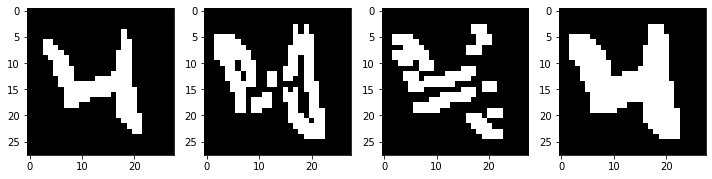

In [109]:
# 3 is idx 7
idx = 20

resx = convolve2d(X_train[idx].reshape((28,28)).astype(int), sobelx, mode="same")
resy = convolve2d(X_train[idx].reshape((28,28)).astype(int), sobely, mode="same")

resx[resx != 0] = 1
resy[resy != 0] = 1

fig, axs = plt.subplots(1, 4, figsize=(10, 4))

axs[0].imshow(X_train[idx].reshape((28,28)), cmap="gray")
axs[1].imshow(resx, cmap="gray")
axs[2].imshow(resy, cmap="gray")
axs[3].imshow(X_train[idx].reshape((28,28)) + resx.astype(bool) + resy.astype(bool), cmap="gray")
plt.tight_layout();

In [74]:
def gsd(X):
    dat = []
    for x in X:
        resx = convolve2d(x.reshape((28,28)).astype(int), sobelx, mode="same")
        resy = convolve2d(x.reshape((28,28)).astype(int), sobely, mode="same")
        dat.append((x.reshape((28,28)) + resx.astype(bool) + resy.astype(bool)).flatten())
        
    return np.array(dat)

In [ ]:
X_train_sobel = gsd(X_train)
X_test_sobel = gsd(X_test)

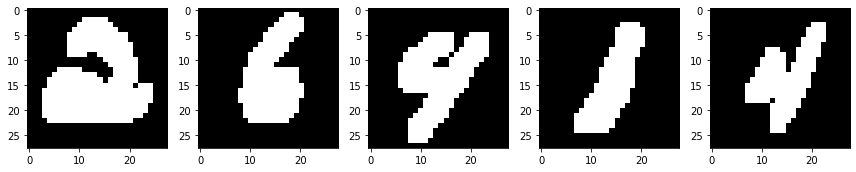

In [85]:
fig, axs = plt.subplots(1, 5, figsize=(12, 4))

cols = np.random.choice(range(X_train.shape[0]), size=5)

for idx, ax in enumerate(axs):
    ax.imshow(X_train_sobel[cols[idx]].reshape((28,28)), cmap="gray")
    
plt.tight_layout()

In [87]:
%%time
hidden_layers = [1024] * 5
lut = Lut(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train_sobel, y_train)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
preds_test = lut.predict(X_test_sobel)
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:10<00:00, 86.20s/it]


Accuracy on training set: 0.91
Accuracy on test set: 0.90
CPU times: user 22.6 s, sys: 30.1 s, total: 52.8 s
Wall time: 8min 24s


In [110]:
%%time
train_accs = []
test_accs = []
for bt in range(2, 11, 1):
    hidden_layers = [1024] * 5
    lut = Lut(bits=[bt] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)
    preds_train = lut.train(X_train_sobel, y_train)
    preds_test = lut.predict(X_test_sobel)
    
    acc_train = accuracy_score(preds_train, y_train)
    acc_test = accuracy_score(preds_test, y_test)
    
    print(f"{bt} train: {acc_train:.2f}")
    print(f"{bt} test: {acc_test:.2f}")
    
    train_accs.append(acc_train)
    test_accs.append(acc_test)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.47s/it]


2 train: 0.70
2 test: 0.72


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.61s/it]


3 train: 0.77
3 test: 0.78


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:29<00:00,  5.92s/it]


4 train: 0.83
4 test: 0.84


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.73s/it]


5 train: 0.86
5 test: 0.86


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:42<00:00, 20.58s/it]


6 train: 0.88
6 test: 0.87


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:22<00:00, 40.41s/it]


7 train: 0.90
7 test: 0.89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:54<00:00, 82.81s/it]


8 train: 0.91
8 test: 0.90


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [16:28<00:00, 197.75s/it]


9 train: 0.94
9 test: 0.91


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [36:29<00:00, 437.89s/it]


10 train: 0.96
10 test: 0.91
CPU times: user 3min 35s, sys: 5min 6s, total: 8min 41s
Wall time: 1h 16min 49s


In [18]:
"".join([f"({i+2},{test_accs[i]:.2f})" for i in range(9)])

'(2,0.69)(3,0.79)(4,0.84)(5,0.85)(6,0.88)(7,0.89)(8,0.89)(9,0.91)(10,0.91)'

In [6]:
def get_diff(dataset):
    dataset_diff_x = np.diff(dataset, axis=1)
    dataset_diff_x = np.hstack((dataset_diff_x, np.zeros((dataset.shape[0],1), dtype=bool)))

    dataset_diff_y = np.zeros_like(dataset)
    for i in range(dataset.shape[0]):
        dataset_diff_y[i] = (
            np.vstack((np.diff(dataset[i].reshape((28,28)), axis=0), np.zeros((1,28), dtype=bool)))
            .flatten()
        )

    dataset_diff = dataset + dataset_diff_x + dataset_diff_y
    return dataset_diff

def get_diff_xy(dataset):
    dataset_diff_x = np.diff(dataset, axis=1)
    dataset_diff_x = np.hstack((dataset_diff_x, np.zeros((dataset.shape[0],1), dtype=bool)))

    dataset_sobely = np.zeros_like(dataset)
    for i in range(dataset.shape[0]):
        dataset_sobely[i] = (
            np.vstack((np.diff(dataset[i].reshape((28,28)), axis=0), np.zeros((1,28), dtype=bool)))
            .flatten()
        )

    return dataset_diff_x, dataset_sobely

In [7]:
X_train_diff = get_diff(X_train)
X_train_diff_x, X_train_diff_y = get_diff_xy(X_train)

In [119]:
plt.rcParams.update(
    {"text.usetex": True, "font.family": "serif", "font.serif": ["Computer Modern Roman"],}
)

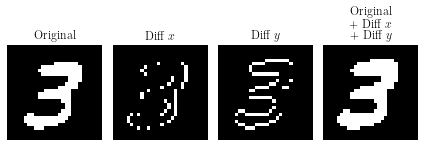

In [120]:
fig, axs = plt.subplots(1, 4)

idx = 7

axs[0].imshow(X_train[idx].reshape((28,28)), cmap="gray", interpolation="none")
axs[0].set_title("Original")
axs[1].imshow(X_train_diff_x[idx].reshape((28,28)), cmap="gray", interpolation="none")
axs[1].set_title("Diff $x$")
axs[2].imshow(X_train_diff_y[idx].reshape((28,28)), cmap="gray", interpolation="none")
axs[2].set_title("Diff $y$")
axs[3].imshow(X_train_diff[idx].reshape((28,28)), cmap="gray", interpolation="none")
axs[3].set_title("Original\n+ Diff $x$\n+ Diff $y$")

for ax in axs:
    ax.axis("off")
    
plt.tight_layout()

In [121]:
fig.savefig(r"thesis/images/diff.pdf", bbox_inches="tight")

# Boosting

In [10]:
class boostedLutClassifier:
    """
    Boosted Lut classifier
    """
    def __init__(self, bits, hidden_layers, num_lut_networks, majority_vote=False, improve_layer_acc=False):
        self.bits = bits
        self.hidden_layers = hidden_layers
        self.num_lut_networks = num_lut_networks
        self.lut_networks_ = []
        self.alphas = []
        self.weight_arr = []
        self.majority_vote = majority_vote
        self.improve_layer_acc = improve_layer_acc
        
    def train(self, X, y):
        weights = np.ones((X.shape[0],)) / X.shape[0]
        mask = np.ones_like(weights, dtype=bool)
        self.weight_arr.append(weights.copy())
        with tqdm(range(self.num_lut_networks - 1)) as t:
            for _ in t:
                lut = Lut(bits=self.bits, hidden_layers=self.hidden_layers, improve_layer_acc=self.improve_layer_acc)
                _ = lut.train(X[mask], y[mask])
                preds = lut.predict(X, majority_vote=self.majority_vote)
                self.lut_networks_.append(lut)
                errn = np.sum(weights * (preds != y)) / np.sum(weights)
                alpha = np.log((1 - errn) / errn)
                self.alphas.append(alpha)
                weights = weights * np.exp(alpha * (preds != y))
                mask = np.argsort(weights)[::-1][:len(weights) // 5]
                self.weight_arr.append(weights.copy())
        
    def predict(self, X):
        for idx, lut in enumerate(self.lut_networks_):
            if idx == 0:
                preds = lut.predict(X, majority_vote=self.majority_vote).astype(float)
                preds[preds == 0] = -1
                preds *= self.alphas[idx]
            else:
                preds_ = lut.predict(X, majority_vote=self.majority_vote).astype(float)
                preds_[preds_ == 0] = -1
                preds_ *= self.alphas[idx]
                preds += preds_
        preds = np.sign(preds)
        preds[preds == -1] = 0
        preds = preds.astype(int)
        return preds

In [7]:
%%time

num_trees_arr = [256, 512, 1024]

tr_accs = []
te_accs = []

for num_trees in num_trees_arr:
    hidden_layers = [1024] * 5
    bits= [2] * (len(hidden_layers) + 1)

    clf = boostedLutClassifier(bits, hidden_layers, num_trees)
    clf.train(X_train, y_train)

    preds_train = clf.predict(X_train)
    tr_acc = accuracy_score(preds_train, y_train)
    tr_accs.append(tr_acc)
    print(f"Num trees: {num_trees} Accuracy on training set: {tr_acc:.2f}")
    preds_test = clf.predict(X_test)
    te_acc = accuracy_score(preds_test, y_test)
    te_accs.append(te_acc)
    print(f"Num trees: {num_trees} Accuracy on test set: {te_acc:.2f}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [52:30<00:00, 12.35s/it]


Num trees: 256 Accuracy on training set: 0.82
Num trees: 256 Accuracy on test set: 0.83


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 511/511 [1:45:27<00:00, 12.38s/it]


Num trees: 512 Accuracy on training set: 0.87
Num trees: 512 Accuracy on test set: 0.87


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1023/1023 [3:36:31<00:00, 12.70s/it]


Num trees: 1024 Accuracy on training set: 0.89
Num trees: 1024 Accuracy on test set: 0.89
CPU times: user 6h 38min 14s, sys: 3h 16min, total: 9h 54min 15s
Wall time: 11h 27min 5s


```python
num_trees_arr = [2, 4, 8, 16, 32, 64, 128]

tr_accs = [
    0.67,
    0.71,
    0.75,
    0.76,
    0.76,
    0.78,
    0.79,
]

te_accs = [
    0.69,
    0.73,
    0.75,
    0.78,
    0.77,
    0.79,
    0.80,
]
```

In [60]:
%%time

num_trees_arr = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

tr_accs = []
te_accs = []

for num_trees in num_trees_arr:
    hidden_layers = [1024] * 5
    bits= [2] * (len(hidden_layers) + 1)

    clf = boostedLutClassifier(bits, hidden_layers, num_trees)
    clf.train(X_train, y_train)

    preds_train = clf.predict(X_train)
    tr_acc = accuracy_score(preds_train, y_train)
    tr_accs.append(tr_acc)
    print(f"Num trees: {num_trees} Accuracy on training set: {tr_acc:.2f}")
    preds_test = clf.predict(X_test)
    te_acc = accuracy_score(preds_test, y_test)
    te_accs.append(te_acc)
    print(f"Num trees: {num_trees} Accuracy on test set: {te_acc:.2f}")
    
tr_accs, te_accs

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:21<00:00, 21.66s/it]


Num trees: 2 Accuracy on training set: 0.67
Num trees: 2 Accuracy on test set: 0.69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:44<00:00, 14.73s/it]


Num trees: 4 Accuracy on training set: 0.63
Num trees: 4 Accuracy on test set: 0.64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:27<00:00, 12.56s/it]


Num trees: 8 Accuracy on training set: 0.66
Num trees: 8 Accuracy on test set: 0.67


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [03:04<00:00, 12.28s/it]


Num trees: 16 Accuracy on training set: 0.70
Num trees: 16 Accuracy on test set: 0.72


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [05:58<00:00, 11.58s/it]


Num trees: 32 Accuracy on training set: 0.73
Num trees: 32 Accuracy on test set: 0.74


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [12:02<00:00, 11.47s/it]


Num trees: 64 Accuracy on training set: 0.86
Num trees: 64 Accuracy on test set: 0.86


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 127/127 [23:51<00:00, 11.27s/it]


Num trees: 128 Accuracy on training set: 0.90
Num trees: 128 Accuracy on test set: 0.90


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [48:07<00:00, 11.32s/it]


Num trees: 256 Accuracy on training set: 0.93
Num trees: 256 Accuracy on test set: 0.93


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 511/511 [1:35:49<00:00, 11.25s/it]


Num trees: 512 Accuracy on training set: 0.93
Num trees: 512 Accuracy on test set: 0.93


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1023/1023 [3:11:05<00:00, 11.21s/it]


Num trees: 1024 Accuracy on training set: 0.94
Num trees: 1024 Accuracy on test set: 0.93
CPU times: user 7h 30min 19s, sys: 3h 45min 26s, total: 11h 15min 46s
Wall time: 12h 13min 12s


([0.6749666666666667,
  0.6313166666666666,
  0.6617666666666666,
  0.7003166666666667,
  0.7349,
  0.8600833333333333,
  0.8991666666666667,
  0.9333333333333333,
  0.9327,
  0.93755],
 [0.6857,
  0.6381,
  0.6679,
  0.7165,
  0.737,
  0.8579,
  0.8998,
  0.9283,
  0.9306,
  0.9349])

In [67]:
# tr_accs, te_accs
bts = [2 ** x for x in range(1, 11)]

for i in range(10):
    print(f"({bts[i]},{te_accs[i]:.2f})", end="")

(2,0.69)(4,0.64)(8,0.67)(16,0.72)(32,0.74)(64,0.86)(128,0.90)(256,0.93)(512,0.93)(1024,0.93)

In [68]:
%%time

num_trees = 1024
hidden_layers = [64] * 5
bits= [2] * (len(hidden_layers) + 1)

clf = boostedLutClassifier(bits, hidden_layers, num_trees)
clf.train(X_train, y_train)

preds_train = clf.predict(X_train)
tr_acc = accuracy_score(preds_train, y_train)
print(f"Num trees: {num_trees} Accuracy on training set: {tr_acc:.2f}")
preds_test = clf.predict(X_test)
te_acc = accuracy_score(preds_test, y_test)
print(f"Num trees: {num_trees} Accuracy on test set: {te_acc:.2f}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1023/1023 [17:38<00:00,  1.03s/it]


Num trees: 1024 Accuracy on training set: 0.94
Num trees: 1024 Accuracy on test set: 0.94
CPU times: user 15min 13s, sys: 14min 27s, total: 29min 41s
Wall time: 34min 15s


## Just plain ensembling

In [13]:
%%time

tr_accs = []
te_accs = []

for num in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
    Y_train = np.zeros((num, y_train.shape[0]), dtype=bool)
    Y_test = np.zeros((num, y_test.shape[0]), dtype=bool)

    for i in range(num):
        hidden_layers = [1024] * 5
        lut = Lut(bits=[2] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=False)

        preds_train = lut.train(X_train, y_train)
        Y_train[i] = preds_train
        preds_test = lut.predict(X_test)
        Y_test[i] = preds_test
        
    tr_acc = accuracy_score(scipy.stats.mode(Y_train, axis=0)[0][0], y_train)
    te_acc = accuracy_score(scipy.stats.mode(Y_test, axis=0)[0][0], y_test)

    tr_accs.append(tr_acc)
    te_accs.append(te_acc)

    print(f"Num trees: {num} Accuracy on training set: {tr_acc:.2f}")
    print(f"Num trees: {num} Accuracy on test set: {te_acc:.2f}")
    
tr_accs, te_accs

Num trees: 2 Accuracy on training set: 0.68
Num trees: 2 Accuracy on test set: 0.69
Num trees: 4 Accuracy on training set: 0.68
Num trees: 4 Accuracy on test set: 0.69
Num trees: 8 Accuracy on training set: 0.76
Num trees: 8 Accuracy on test set: 0.77
Num trees: 16 Accuracy on training set: 0.76
Num trees: 16 Accuracy on test set: 0.77
Num trees: 32 Accuracy on training set: 0.77
Num trees: 32 Accuracy on test set: 0.78
Num trees: 64 Accuracy on training set: 0.78
Num trees: 64 Accuracy on test set: 0.79
Num trees: 128 Accuracy on training set: 0.77
Num trees: 128 Accuracy on test set: 0.79
Num trees: 256 Accuracy on training set: 0.78
Num trees: 256 Accuracy on test set: 0.79
Num trees: 512 Accuracy on training set: 0.78
Num trees: 512 Accuracy on test set: 0.79
Num trees: 1024 Accuracy on training set: 0.78
Num trees: 1024 Accuracy on test set: 0.79
CPU times: user 4h 10min 49s, sys: 2h 40min 52s, total: 6h 51min 42s
Wall time: 8h 34min 43s


([0.6847,
  0.6836,
  0.75925,
  0.7551333333333333,
  0.76885,
  0.7778666666666667,
  0.7709833333333334,
  0.77755,
  0.77765,
  0.78045],
 [0.6899, 0.6944, 0.7744, 0.7695, 0.781, 0.7858, 0.7878, 0.79, 0.7894, 0.7917])

In [2]:
tr_accs = [0.6847,
  0.6836,
  0.75925,
  0.7551333333333333,
  0.76885,
  0.7778666666666667,
  0.7709833333333334,
  0.77755,
  0.77765,
  0.78045]

te_accs = [0.6899, 0.6944, 0.7744, 0.7695, 0.781, 0.7858, 0.7878, 0.79, 0.7894, 0.7917]

bts = [2 ** x for x in range(1, 11)]

for i in range(10):
    print(f"({bts[i]},{te_accs[i]:.2f})", end="")

(2,0.69)(4,0.69)(8,0.77)(16,0.77)(32,0.78)(64,0.79)(128,0.79)(256,0.79)(512,0.79)(1024,0.79)

# Random forests

**Algo**
- For each individual tree
  - Select subset of training data

In [13]:
class randomLutClassifier:
    """
    Random forest-like lut classifier
    """
    def __init__(self, bits, hidden_layers, num_lut_networks):
        self.bits = bits
        self.hidden_layers = hidden_layers
        self.num_lut_networks = num_lut_networks
        self.lut_networks_ = []
        self.masks = []
        
    def train(self, X, y):
        with tqdm(range(self.num_lut_networks - 1)) as t:
            for _ in t:
                lut = Lut(bits=self.bits, hidden_layers=self.hidden_layers)
                mask = np.random.choice([True, False], size=X.shape[0])
                self.masks.append(mask)
                preds = lut.train(X[mask], y[mask])
                self.lut_networks_.append(lut)
        
    def predict(self, X):
        preds = []
        for idx, lut in enumerate(self.lut_networks_):
            pred = lut.predict(X)
            preds.append(pred)
                
        preds = np.apply_along_axis(scipy.stats.mode, 0, preds)[0][0]
        return preds

In [17]:
%%time

hidden_layers = [1024] * 5
clf = randomLutClassifier(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, num_lut_networks=64)
clf.train(X_train, y_train)

preds_train = clf.predict(X_train)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
preds_test = clf.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [3:30:22<00:00, 200.36s/it]


Accuracy on training set: 0.89
Accuracy on test set: 0.87
CPU times: user 40min 8s, sys: 38min 27s, total: 1h 18min 36s
Wall time: 12h 12s


# Combining different methods

In [ ]:
%%time

hidden_layers = [64] * 5
bits= [2] * (len(hidden_layers) + 1)

clf = boostedLutClassifier(bits, hidden_layers, num_lut_networks=256, improve_layer_acc=True)
clf.train(X_train_diff, y_train)

preds_train = clf.predict(X_train_diff)
tr_acc = accuracy_score(preds_train, y_train)

In [14]:
print(f"Accuracy on training set: {tr_acc:.3f}")
preds_test = clf.predict(X_test)
te_acc = accuracy_score(preds_test, y_test)
print(f"Accuracy on test set: {te_acc:.3f}")

Accuracy on training set: 0.756
Accuracy on test set: 0.728


In [16]:
X_train_diff = get_diff(X_train)
X_test_diff = get_diff(X_test)

In [17]:
%%time

hidden_layers = [64] * 5
bits= [2] * (len(hidden_layers) + 1)

clf = boostedLutClassifier(bits, hidden_layers, num_lut_networks=1024, improve_layer_acc=True)
clf.train(X_train_diff, y_train)

preds_train = clf.predict(X_train_diff)
tr_acc = accuracy_score(preds_train, y_train)
print(f"Accuracy on training set: {tr_acc:.3f}")
preds_test = clf.predict(X_test_diff)
te_acc = accuracy_score(preds_test, y_test)
print(f"Accuracy on test set: {te_acc:.3f}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1023/1023 [5:31:25<00:00, 19.44s/it]


Accuracy on training set: 0.754
Accuracy on test set: 0.779
CPU times: user 4h 28min 34s, sys: 45min 27s, total: 5h 14min 1s
Wall time: 5h 46min 41s


# Size vs. acc

In [15]:
from lut import get_lut_size

In [7]:
nums = [2 ** x for x in range(1, 13)]
lut_sizes = [get_lut_size(8, [num] * 5 + [1]) / 1000 for num in nums]

In [18]:
%%time
accs_tr = []
accs_te = []
for num in nums:
    hidden_layers = [num] * 5
    lut = Lut(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=False)

    preds_train = lut.train(X_train, y_train)
    preds_test = lut.predict(X_test)
    
    acc_tr = accuracy_score(preds_train, y_train)
    acc_te = accuracy_score(preds_test, y_test)
    
    accs_tr.append(acc_tr)
    accs_te.append(acc_te)
    
    print(f"Num: {num} Accuracy on training set: {acc_tr:.2f}")
    print(f"Num: {num} Accuracy on test set: {acc_te:.2f}")

Num: 2 Accuracy on training set: 0.62
Num: 2 Accuracy on test set: 0.63
Num: 4 Accuracy on training set: 0.66
Num: 4 Accuracy on test set: 0.67
Num: 8 Accuracy on training set: 0.75
Num: 8 Accuracy on test set: 0.75
Num: 16 Accuracy on training set: 0.79
Num: 16 Accuracy on test set: 0.79
Num: 32 Accuracy on training set: 0.84
Num: 32 Accuracy on test set: 0.83
Num: 64 Accuracy on training set: 0.85
Num: 64 Accuracy on test set: 0.84
Num: 128 Accuracy on training set: 0.88
Num: 128 Accuracy on test set: 0.87
Num: 256 Accuracy on training set: 0.88
Num: 256 Accuracy on test set: 0.86
Num: 512 Accuracy on training set: 0.89
Num: 512 Accuracy on test set: 0.87
Num: 1024 Accuracy on training set: 0.89
Num: 1024 Accuracy on test set: 0.88
Num: 2048 Accuracy on training set: 0.89
Num: 2048 Accuracy on test set: 0.87
CPU times: user 2min 25s, sys: 3min 28s, total: 5min 53s
Wall time: 38min 11s


In [22]:
accs_tr, accs_te

([0.6249,
  0.6638333333333334,
  0.7486333333333334,
  0.7937333333333333,
  0.83615,
  0.8530833333333333,
  0.88195,
  0.8777833333333334,
  0.88995,
  0.89025,
  0.8900833333333333],
 [0.6317,
  0.6711,
  0.749,
  0.7861,
  0.8266,
  0.839,
  0.8679,
  0.8578,
  0.872,
  0.878,
  0.8743])

In [ ]:
%%time
hidden_layers = [4096] * 5
lut = Lut(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train, y_train)
preds_test = lut.predict(X_test)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.4f}")
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.4f}")

  0%|                                                                                                                                             | 0/5 [00:00<?, ?it/s]

In [29]:
accuracy_score(preds_train, y_train), accuracy_score(preds_test, y_test)

(0.8898, 0.8726)

In [6]:
accs_tr = [0.6249,
  0.6638333333333334,
  0.7486333333333334,
  0.7937333333333333,
  0.83615,
  0.8530833333333333,
  0.88195,
  0.8777833333333334,
  0.88995,
  0.89025,
  0.8900833333333333,
  0.8898]

accs_te = [0.6317,
  0.6711,
  0.749,
  0.7861,
  0.8266,
  0.839,
  0.8679,
  0.8578,
  0.872,
  0.878,
  0.8743,
  0.8726]

In [14]:
# nums, lut_sizes
for i in range(len(accs_tr)):
    print(f"({nums[i]},{lut_sizes[i]:.3f})", end="")

(2,0.352)(4,0.672)(8,1.312)(16,2.592)(32,5.152)(64,10.272)(128,20.512)(256,40.992)(512,81.952)(1024,163.872)(2048,327.712)(4096,655.392)

In [18]:
lut_sizes

[2.5605,
 5.121,
 10.242,
 20.484,
 40.968,
 81.936,
 163.872,
 327.744,
 655.488,
 1310.976,
 2621.952]

In [19]:
lut_sizes = [get_lut_size(i, [1024] * 5 + [1]) / 1000 for i in range(2, 13)]
for i in range(2, 13):
    print(f"({i},{lut_sizes[i - 2]:.3f})", end="")

(2,2.561)(3,5.121)(4,10.242)(5,20.484)(6,40.968)(7,81.936)(8,163.872)(9,327.744)(10,655.488)(11,1310.976)(12,2621.952)

## Viz

In [81]:
X_, _, _, _ = load_mnist()

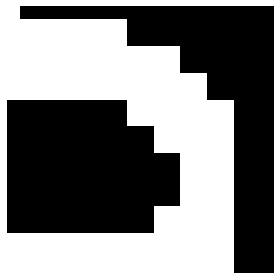

In [95]:
fig, ax = plt.subplots(1, 1)

ax.imshow(X_train[7].reshape((28,28)), cmap="gray")
xstart = 10
ax.set_xlim(xstart, xstart + 10)
ystart = 14
ax.set_ylim(ystart, ystart + 10)
ax.axis("off")

plt.tight_layout();

In [84]:
# fig.savefig(r"thesis/images/mnist_binarized.pdf", bbox_inches="tight")

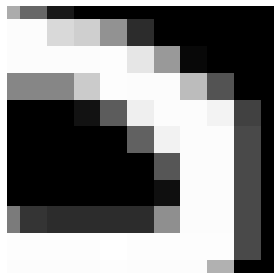

In [96]:
fig, ax = plt.subplots(1, 1)

ax.imshow(X_[7].reshape((28,28)), cmap="gray")
xstart = 10
ax.set_xlim(xstart, xstart + 10)
ystart = 14
ax.set_ylim(ystart, ystart + 10)
ax.axis("off")

plt.tight_layout();

In [97]:
fig.savefig(r"thesis/images/mnist_raw.pdf", bbox_inches="tight")

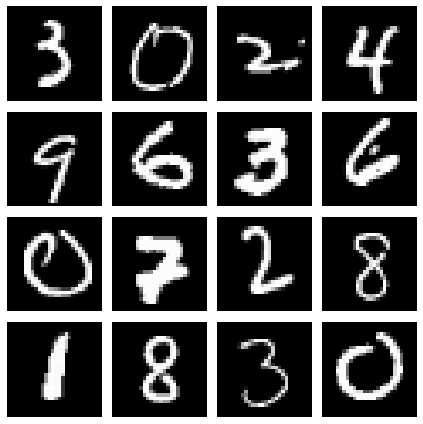

In [116]:
fig, axs = plt.subplots(4, 4, figsize=(6, 6))

choice = np.random.choice(len(X_), size=16)

for i, ax in enumerate(axs.flatten()):
    ax.imshow(X_[choice[i]].reshape((28,28)), cmap="gray")
    ax.axis("off")
    
plt.tight_layout()

In [117]:
# fig.savefig(r"thesis/images/mnist.pdf", bbox_inches="tight")